In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# feature 1
x = np.arange(1, 11)
# feature 2
y = 2 * x + np.random.randn(10) * 2
X = np.vstack((x,y))
X.T

array([[ 1.        ,  2.62941246],
       [ 2.        ,  3.99124119],
       [ 3.        ,  3.68936342],
       [ 4.        , 11.88148136],
       [ 5.        , 11.03617864],
       [ 6.        , 12.3203045 ],
       [ 7.        , 16.65898765],
       [ 8.        , 17.69802366],
       [ 9.        , 18.10113366],
       [10.        , 22.35822118]])

In [3]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = (x.mean(), y.mean())
Xcentered, m

((array([-4.5, -3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
  array([-9.40702231, -8.04519358, -8.34707135, -0.15495341, -1.00025613,
          0.28386972,  4.62255288,  5.66158889,  6.06469889, 10.32178641])),
 (5.5, 12.036434772995467))

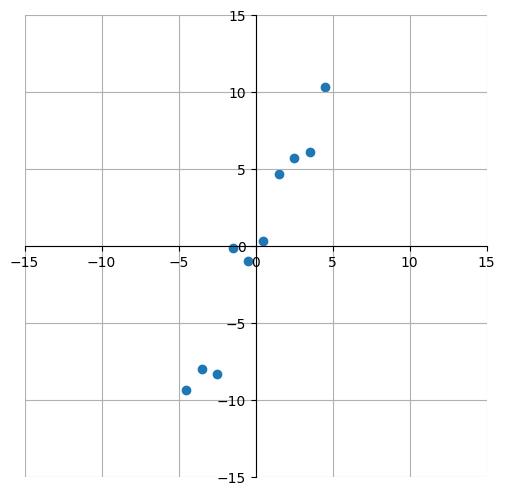

In [4]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

ax.scatter(Xcentered[0], Xcentered[1])
# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set(xlim=(-15, 15), ylim=(-15, 15))

ax.set_aspect('equal')

plt.grid()

In [5]:
covmat = np.cov(Xcentered)
covmat

array([[ 9.16666667, 20.11047065],
       [20.11047065, 46.74859388]])

In [6]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 9.16666667 20.11047065]
 [20.11047065 46.74859388]] 

Variance of X:  9.166666666666666
Variance of Y:  46.74859387606629
Covariance X and Y:  20.110470653893856


In [7]:
x1 = np.array([1, 2]).reshape((2,1))
x1.shape
e1 = np.array([0.707, 0.707]).reshape((2,1))
np.dot(e1.T, x1)

array([[2.121]])

In [8]:
np.linalg.eig(covmat)

(array([ 0.43434298, 55.48091756]),
 array([[-0.9172594 , -0.39829033],
        [ 0.39829033, -0.9172594 ]]))

In [9]:
evalues, evectors = np.linalg.eig(covmat)
print(f'eigenvalues for covmat is: {evalues} \n\neigenvectors for covmat is: {evectors}')

eigenvalues for covmat is: [ 0.43434298 55.48091756] 

eigenvectors for covmat is: [[-0.9172594  -0.39829033]
 [ 0.39829033 -0.9172594 ]]


[ 0.39829033 -0.9172594 ]


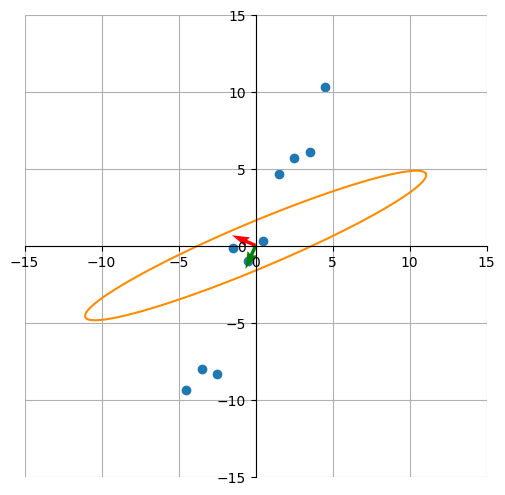

In [39]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
origin = np.array([[0, 0], [0, 0]])

ax.scatter(Xcentered[0], Xcentered[1])
plt.quiver(*origin, evectors[0, :], evectors[1, :], color=['r', 'g'])

#--------------------------------------------------------------------

# angle between eigenvector and e1 [1, 0]
vector1 = evectors[1, :]
print(vector1)
angle = np.dot(vector1, [1,0]) / np.linalg.norm(vector1) / np.linalg.norm([1,0])

a = 12.       #radius on the x-axis
b = 1.5      #radius on the y-axis
t_rot = angle #rotation angle

t = np.linspace(0, 2*np.pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
     #u,v removed to keep the same center location
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
     #2-D rotation matrix

Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot, Ell[:,i])

plt.plot(Ell_rot[0,:] , Ell_rot[1,:],'darkorange' )    #rotated ellipse
#--------------------------------------------------------------------

# Move left y-axis and bottom x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set(xlim=(-15, 15), ylim=(-15, 15))

ax.set_aspect('equal')

plt.grid()

In [40]:
evalues, evectors

(array([ 0.43434298, 55.48091756]),
 array([[-0.9172594 , -0.39829033],
        [ 0.39829033, -0.9172594 ]]))

In [52]:
v = -evectors[:, 1]
Xnew = np.dot(v, Xcentered)
v.shape, Xnew.shape

((2,), (10,))

In [57]:
n = 9     #номер элемента случайной величины
Xrestored = np.dot(Xnew[n],v) + m
print('Restored: ', Xrestored)
print('Original: ', X[:,n])


Restored:  [ 9.98477387 22.36483264]
Original:  [10.         22.35822118]


In [58]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X.T)

In [59]:
print('Our reduced X: \n', Xnew)
print('Sklearn reduced X: \n', XPCAreduced)

Our reduced X: 
 [-10.42098616  -8.77354562  -8.65215551  -0.73956797  -1.11663951
   0.45952734   4.83751559   6.18887147   6.95691824  11.26006213]
Sklearn reduced X: 
 [[-10.42098616]
 [ -8.77354562]
 [ -8.65215551]
 [ -0.73956797]
 [ -1.11663951]
 [  0.45952734]
 [  4.83751559]
 [  6.18887147]
 [  6.95691824]
 [ 11.26006213]]


In [65]:
print(f'mean values from pca {pca.mean_}')
print(f'components values from pca {pca.components_}')
print(f'variance of projections from pca {pca.explained_variance_}')
print(f'fraction of inforation from pca {pca.explained_variance_ratio_}')


mean values from pca [ 5.5        12.03643477]
components values from pca [[0.39829033 0.9172594 ]]
variance of projections from pca [55.48091756]
fraction of inforation from pca [0.99223212]


In [2]:
def pascal_triangle():
    """Yields an infinite sequence of Pascal triangle numbers"""
    row = [1]  # Start with the first row of the triangle

    while True:
        yield row  # Yield the current row

        # Calculate the next row of the triangle
        next_row = [1]  # Start with the first element
        for i in range(1, len(row)):
            next_row.append(row[i-1] + row[i])  # Calculate the next element
        next_row.append(1)  # End with the last element
        row = next_row  # Update the current row for the next iteration




In [3]:
# Create the generator
pt = pascal_triangle()


In [8]:
next(pt)

[1, 4, 6, 4, 1]

In [ ]:

# Print the first 10 rows of the triangle
for i in range(10):
    print(next(pt))